In [1]:
%%sh
jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:

# Neural Style Transfer

import ipywidgets as widgets
from IPython.display import display


from __future__ import absolute_import
from __future__ import division

import matplotlib.pyplot as plt
%matplotlib inline

import ast
import os
import numpy as np
import random
import tensorflow as tf
import urllib2


import io
from IPython.display import display
from IPython.display import Image

from magenta.models.image_stylization import image_utils
from magenta.models.image_stylization import model



def on_image_change(*args):
   global fileName 
   fileName= imageSelection.value

def on_style_change(*args):
   global styleName 
   styleName= styleSelection.value
    
direc = 'Images/'
ext = '.jpg' # Select your file delimiter

file_dict = {} # Create an empty dict
options = {}
image_name = {}
# Select only files with the ext extension
txt_files = [i for i in os.listdir(direc) if os.path.splitext(i)[1] == ext]

# Iterate over your txt files
for f in txt_files:
    # Open them and assign them to file_dict
    with open(os.path.join(direc,f)) as file_object:
        file_dict[f] = file_object.name

# Iterate over your dict and print the key/val pairs.
for i in file_dict:
   options[i] = file_dict[i]
   image_name[file_dict[i]] = i


imageSelection = widgets.Dropdown(
    options=options,
    description='Select an Image:',
)

imageSelection.observe(on_image_change, 'value')
display(imageSelection)
fileName = imageSelection.value

styleSelection = widgets.Dropdown(
    options={'monet':'monet','varied':'varied','japanese':'japanese'},
    description='Select a style:',
)
styleSelection.observe(on_style_change, 'value')
styleName = styleSelection.value
display(styleSelection)





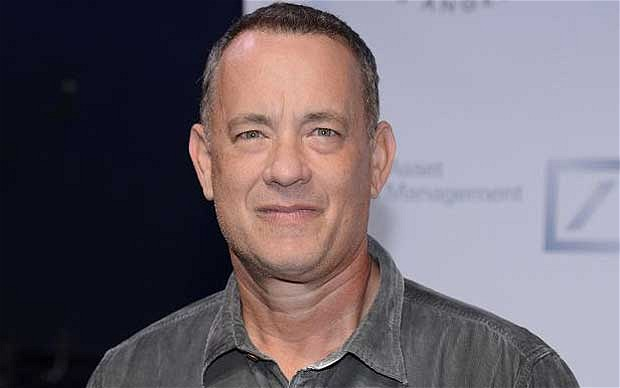

In [9]:
file = open(fileName, "rb")
input_image = file.name
Image(filename=input_image)

In [10]:


demo = styleName

if demo == 'monet':
    checkpoint = '/magenta-models/multistyle-pastiche-generator-monet.ckpt'
    num_styles = 10  # Number of images in checkpoint file. Do not change.
elif demo == 'varied':
    checkpoint = '/magenta-models/multistyle-pastiche-generator-varied.ckpt'
    num_styles = 32  # Number of images in checkpoint file. Do not change.
elif demo == 'japanese':
    checkpoint = '/magenta-data/japan'
    num_styles = 10  # Number of images in checkpoint file. Do not change.
    
widgets.HTML(
    value= '<br><h1>Applying style <b>'+styleName+'</b> on Image<b> ' + image_name[fileName]+'</b></h1>' ,
    placeholder='Some HTML',
    description='Some HTML',
    disabled=False
)

In [17]:
%%sh -s "$input_image" "$checkpoint"
image_stylization_transform       --num_styles=10       --checkpoint=$2      --input_image=$1       --which_styles="{0:0.1,1:0.1,2:0.1,3:0.1,4:0.1,5:0.1,6:0.1,7:0.1,8:0.1,9:0.1}"       --output_dir=/magenta/magenta/models/image_stylization/Images/      --output_basename="result"

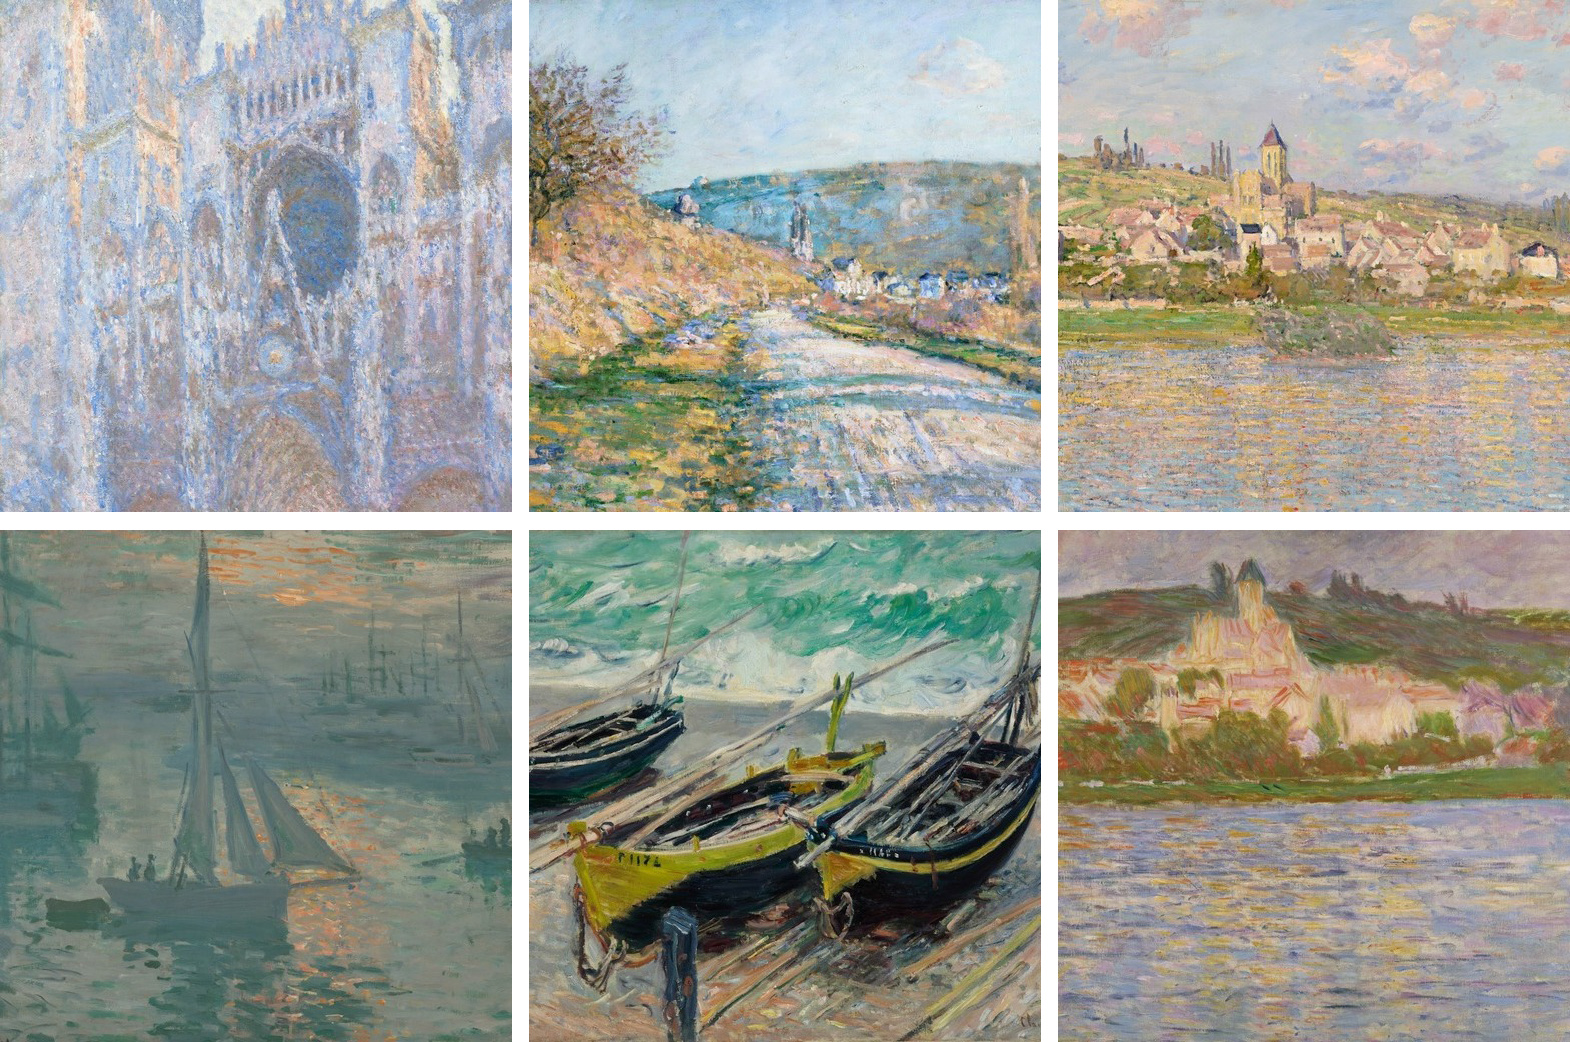

In [12]:
Image(filename="Features/monetstyles.jpg")

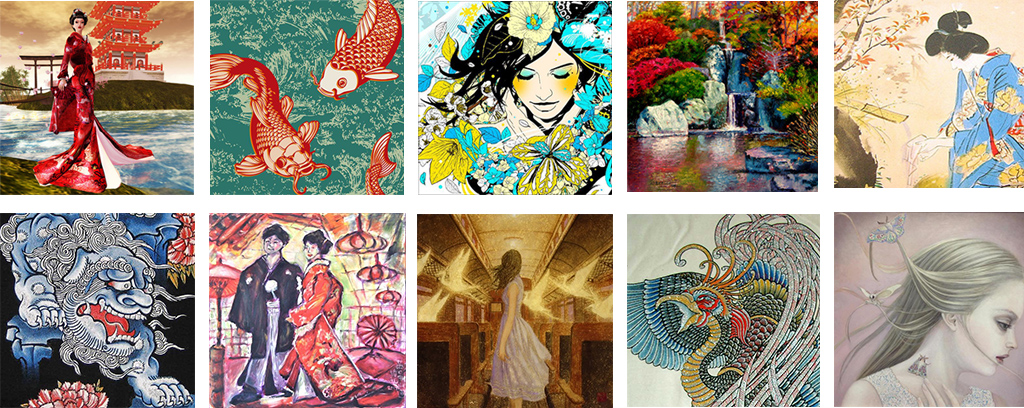

In [13]:
Image(filename="Features/jp.jpg")

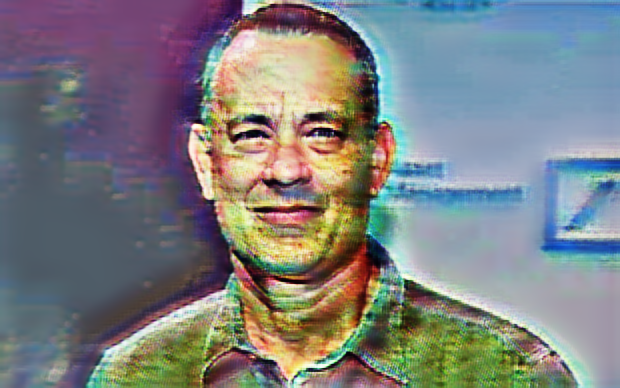

In [14]:

Image(filename="/magenta/magenta/models/image_stylization/Images/result_3.png")



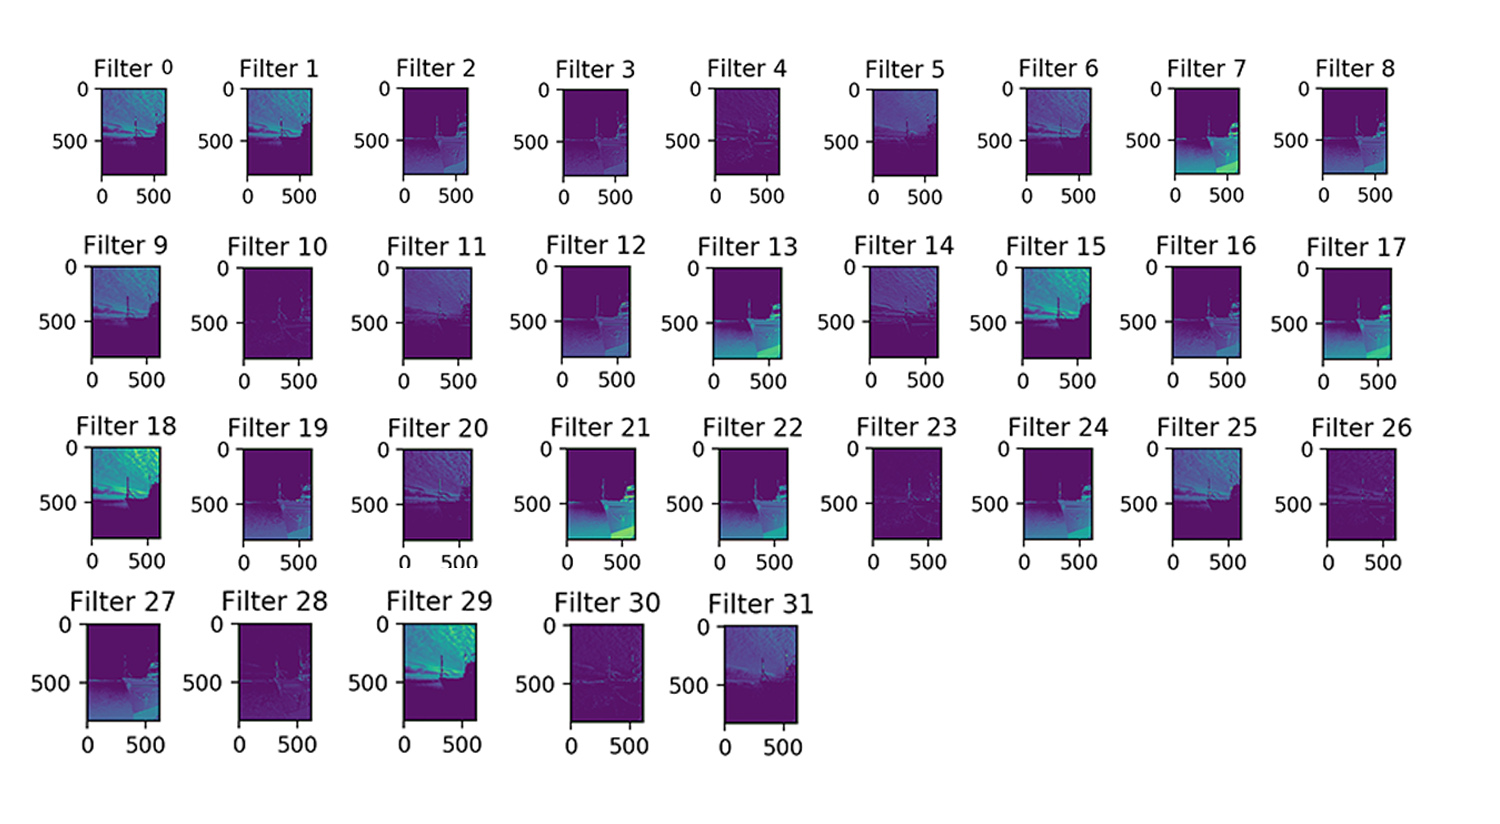

In [15]:
widgets.HTML(
    value= '<br><h1> Layer ''conv1'' Activations</br></h1>' ,
    placeholder='Some HTML',
    description='Some HTML',
    disabled=False
)

Image(filename='Features/conv1.jpg')





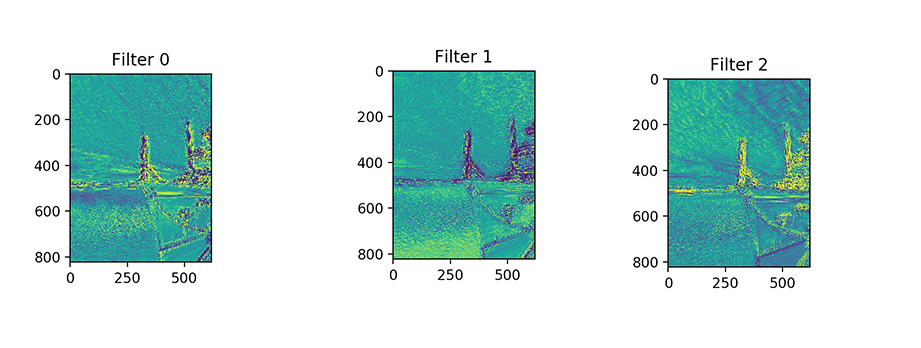

In [16]:
widgets.HTML(
    value= '<br><h1> Layer ''conv3'' Activations</br></h1>' ,
    placeholder='Some HTML',
    description='Some HTML',
    disabled=False
)

Image(filename='Features/conv3.jpg')
